### Autor(es): Andrei Silva Santos e Laverty Diderone de Assis Ladeia
Programa de Pós-Graduação em Modelagem Computacional</br></br>
Disciplina: Métodos Numéricos</br></br>
Turma: 2024.1</br></br>
Plataforma:</br></br>
- CPU: 12th Gen Intel(R) Core(TM) i5-12500H, 16 núcleos 4.5 GHz
- Memory: 8GiB 4800 MT/s
- Swap: 16GiB
- GPU: GeForce RTX 3050
- SO: Ubuntu 22.04
- Python 3.1erro_aceitavel2
- Driver Version: 550.54.14
- CUDA Version: 12.4

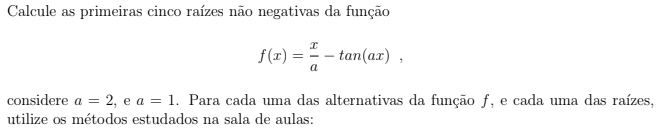

#### **Para a = 1: $f(x) = x - tan(x)$**

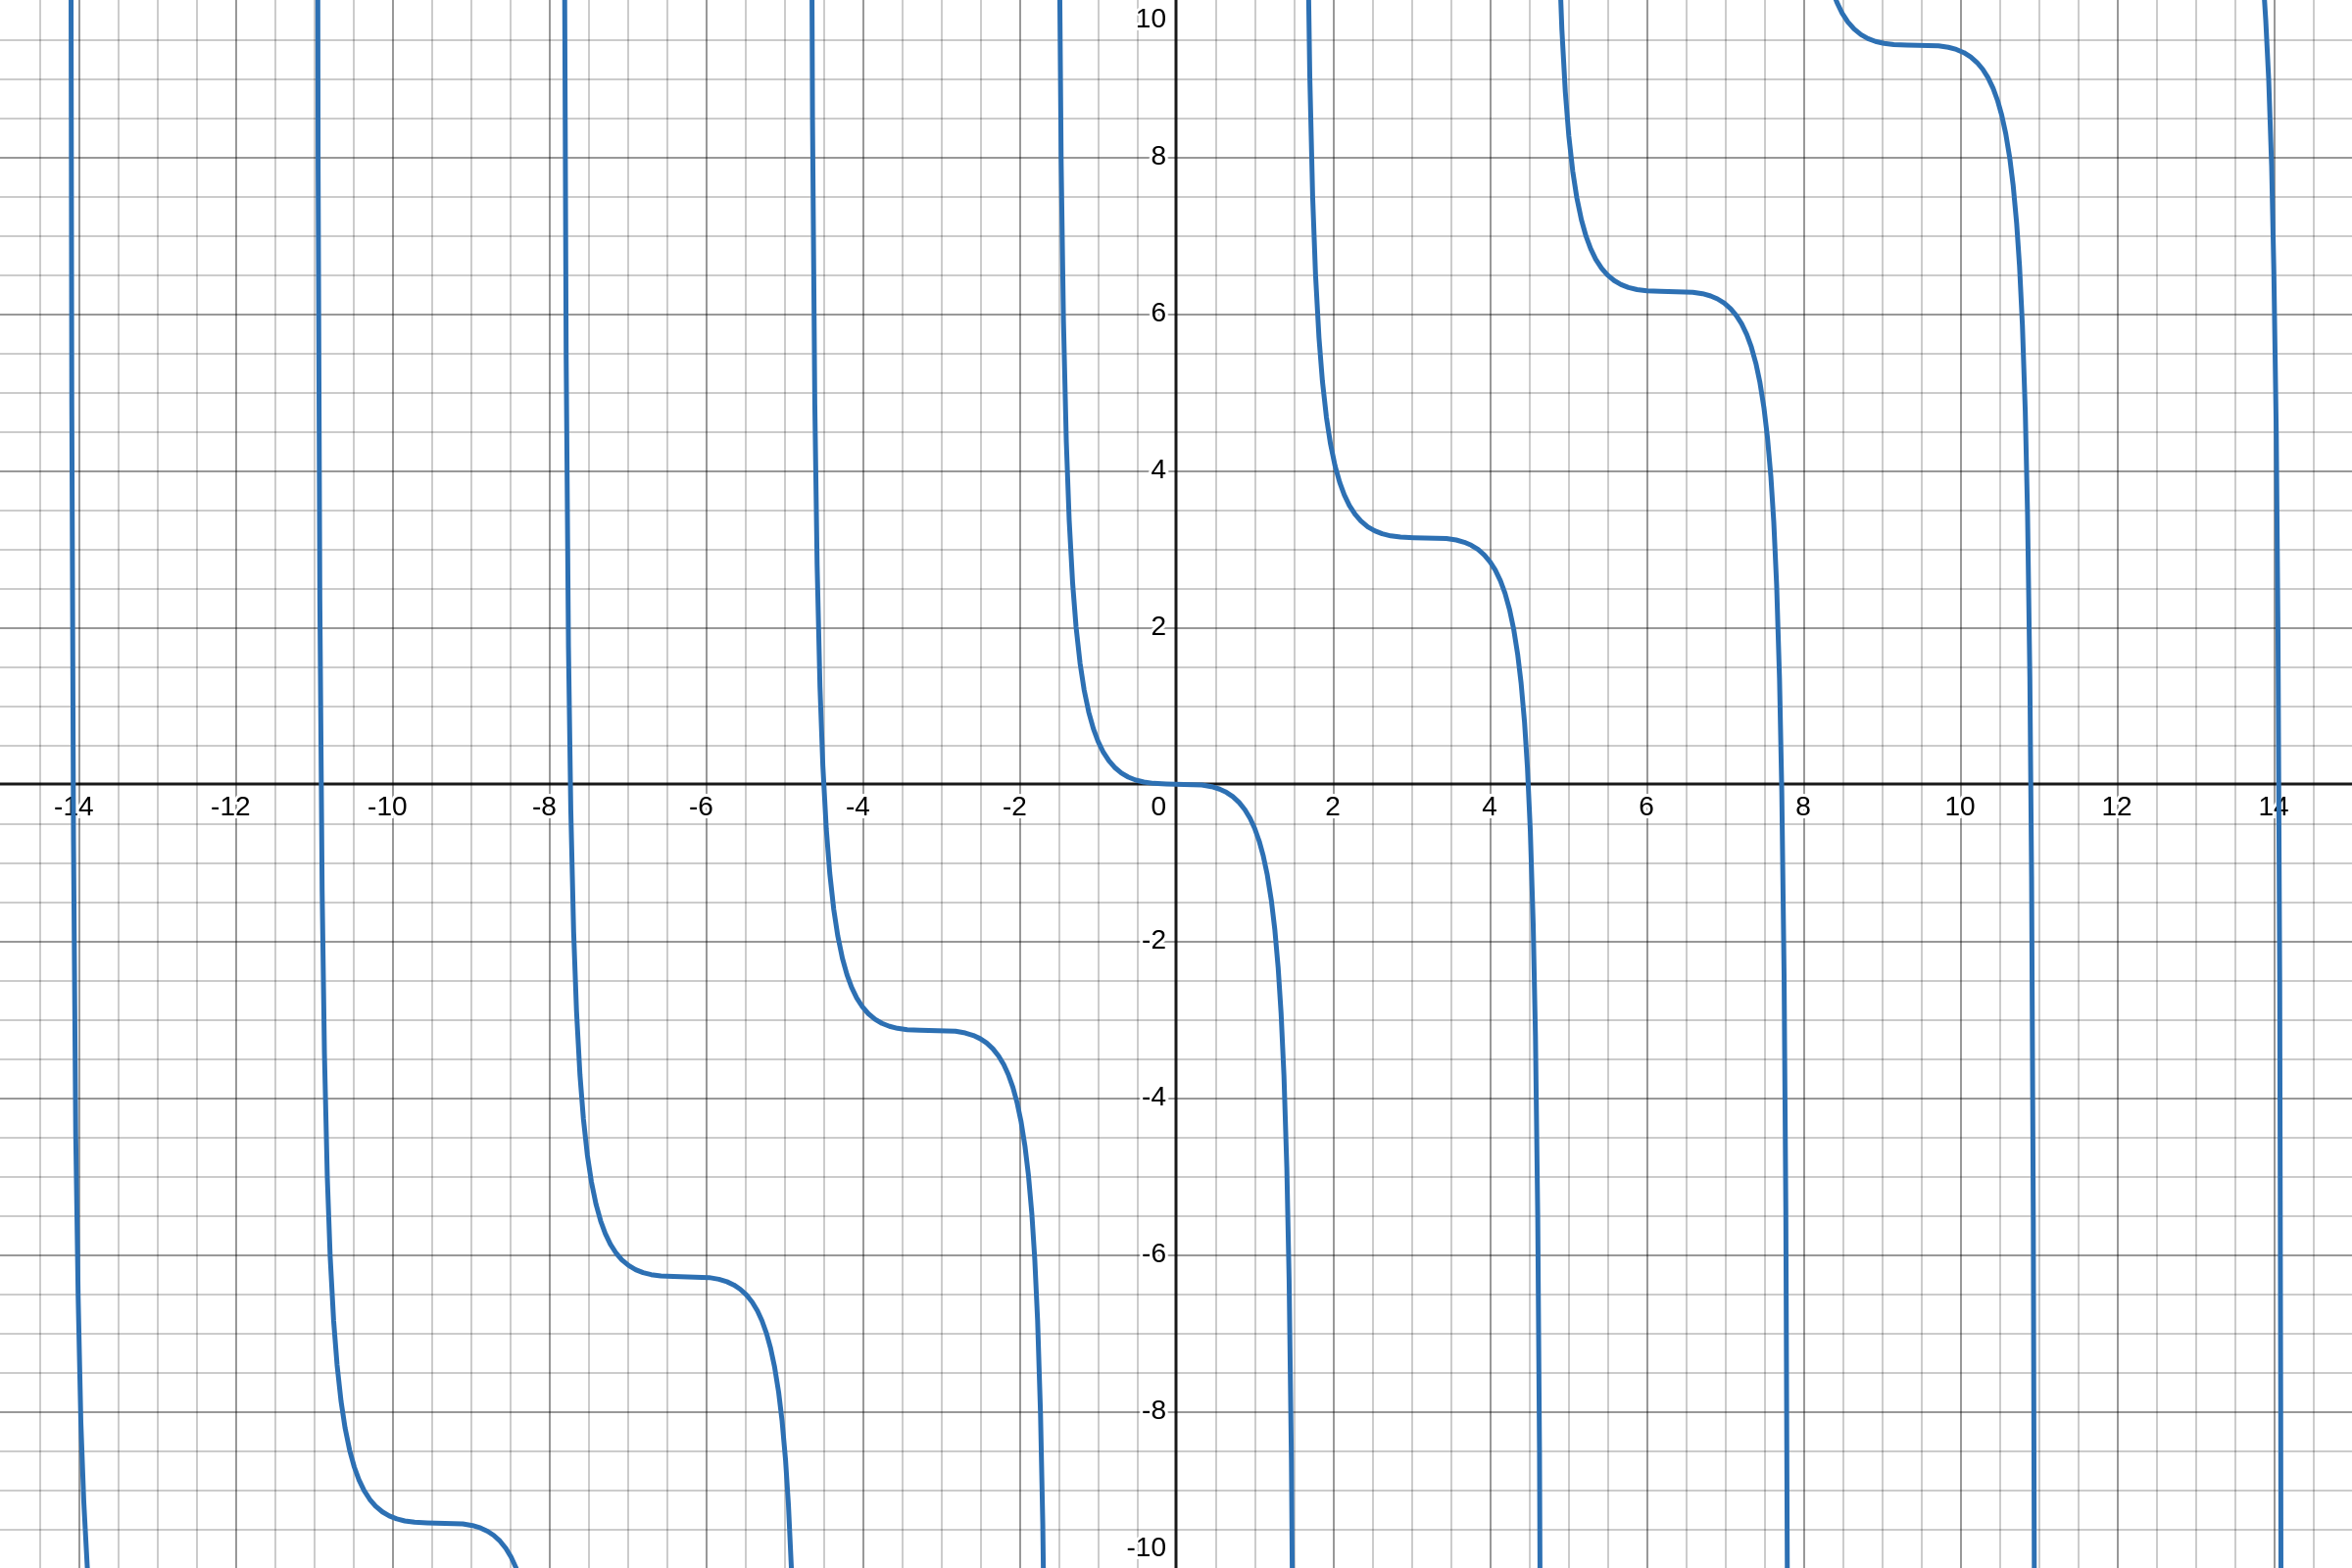

#### Primeiras 5 Raízes positivas para a = 1
```
f(x) = x − tan(x)
```

- R1: x = (4.493)
- R2: x = (7.725)
- R3: x = (10.904)
- R4: x = (14.066)
- R5: x = (17.221)

#### * **Para a = 2: $f(x) = \frac{x}{2} - tan(2x)$**

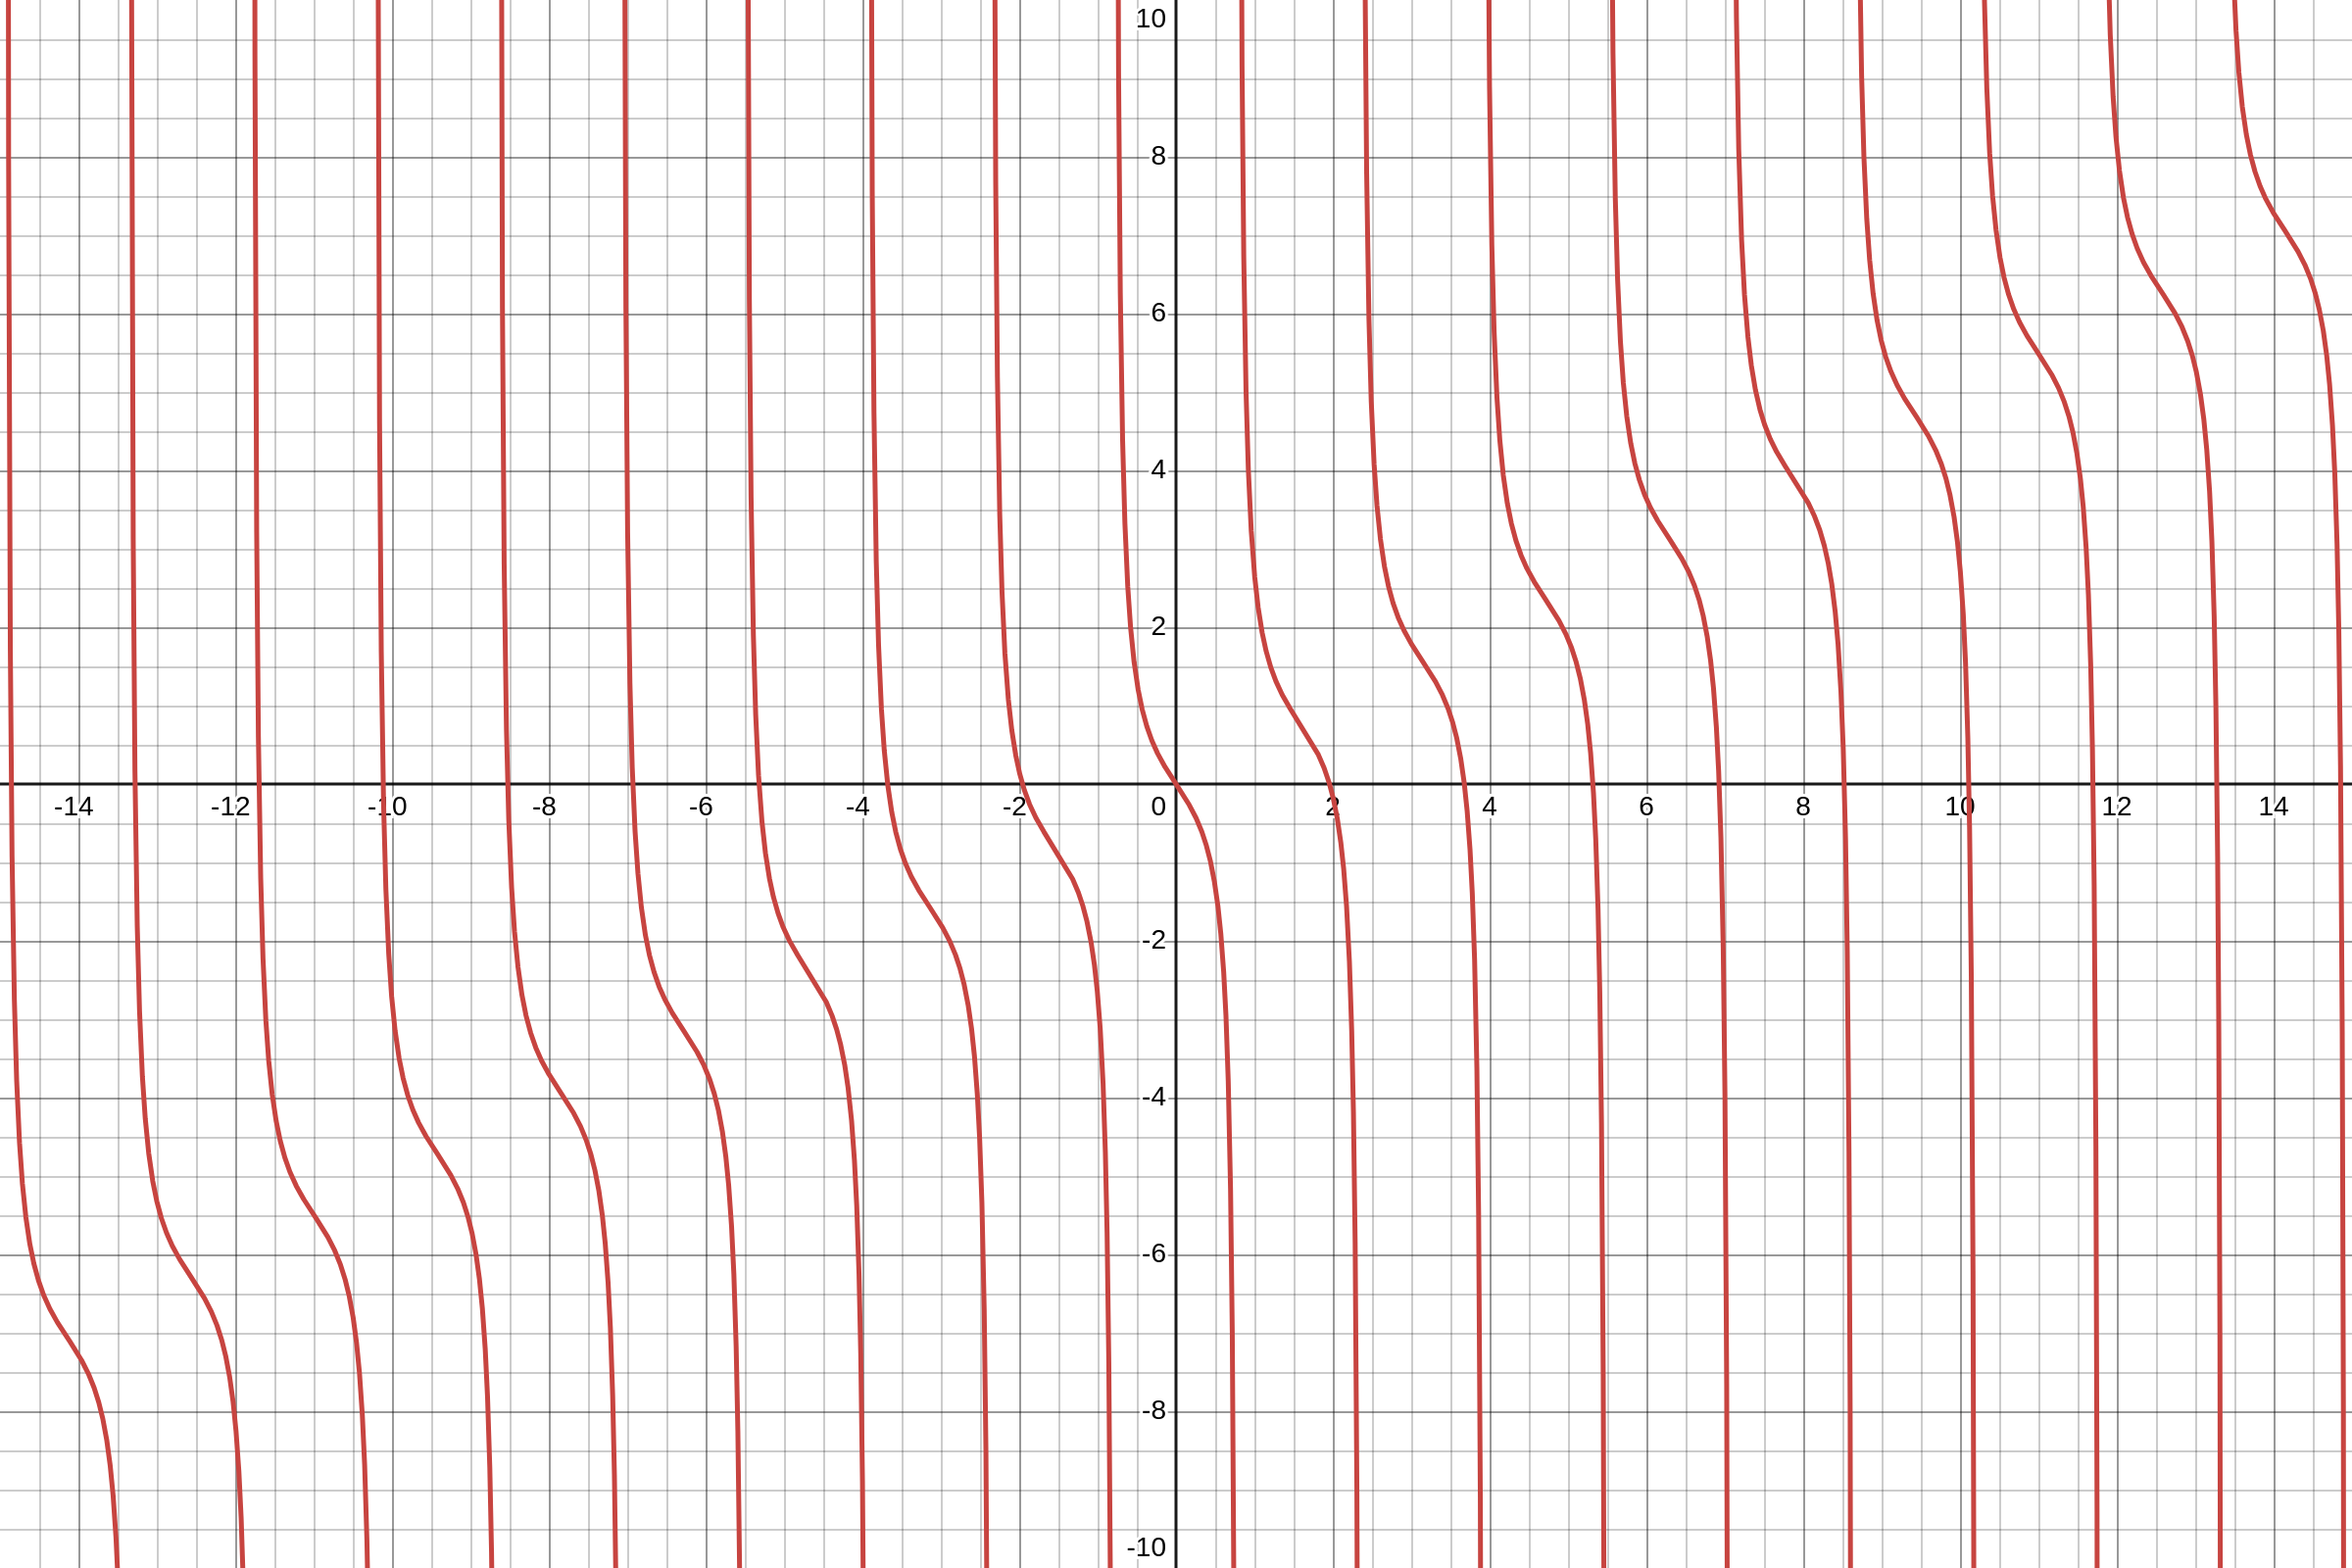

#### Primeiras 5 Raízes positivas para a = 2
```
f(x) = x/2 − tan(2x)
```
- R1: x = (1.958)
- R2: x = (3.678)
- R3: x = (5.318)
- R4: x = (6.928)
- R5: x = (8.524)

## Seguem os 5 métodos de cálculo de raizes

#### Parâmetros gerais
* Tolerância: $\mathrm{10}^{-6}$
* Máximo de interações: 10

#### Funções auxiliares

In [29]:
import matplotlib.pyplot as plt

iter_maximo = 10
erro_aceitavel = math.pow(10, -6)

def print_graficos(matriz_intervalos, x_raizes, nome_algoritmo):
    for i in range(len(x_raizes)):
        if x_raizes[i] is None:
            err_msg = ('\n\033[91m' + f"{i+1}° Raiz não encontrada. O algoritmo {nome_algoritmo} não foi capaz de encontrar uma raiz no intervalo" 
            f"[{matriz_intervalos[i][0]}, {matriz_intervalos[i][1]}] após {iter_maximo} iterações.")
            print(err_msg)
            continue
        plt.figure()
        plt.scatter(x_raizes[i], 0, color='red')
        plt.title(f'Zoom no gráfico da função e {i+1}° Raiz Estimada. x = {x_raizes[i]}')
        plt.xlabel('x')
        plt.ylabel(f'f(x) = x/a - tan(ax), sendo a = {a}')
        plt.grid(True)
        x_vals = np.linspace(matriz_intervalos[i][0], matriz_intervalos[i][1], 200)  # Gerando 400 pontos de -10 a 10
        y_vals = [funcao(x) for x in x_vals]
        plt.plot(x_vals, y_vals)
        plt.show()

### Método da Bisseção

O Método da Bissecção supõe que uma função f contínua definida no intervalo $[xl, xu]$, onde xl e xu corresponde ao menor e maior valor do intervalo respectivamente. Portanto a condição $f(xl) * f(xu) < 0$ deve ser satisfeita considerando o teorema do valor intermediário (TVI). Com isso, pode-se afirmar que existe uma raiz xr para a função f, onde $xl < xr < xu$.

A seguir, o método da bissecção é implementado de acordo com o algoritmo apresentado em sala de aula.

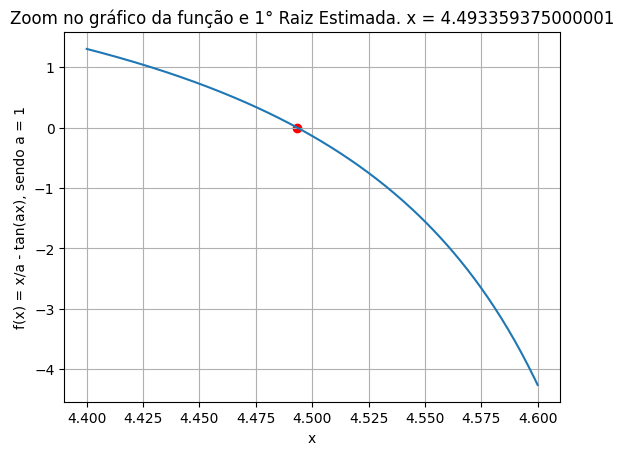

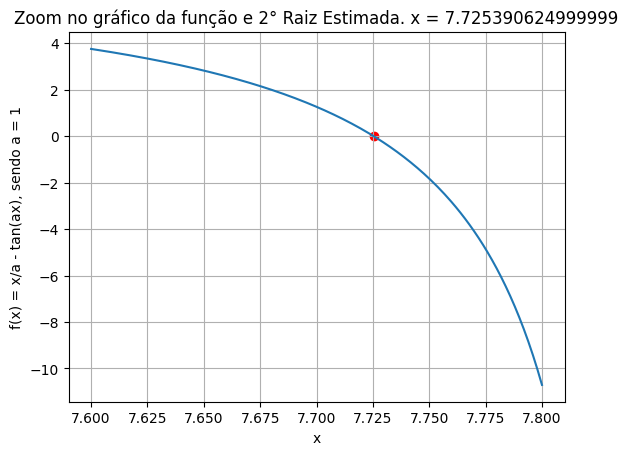

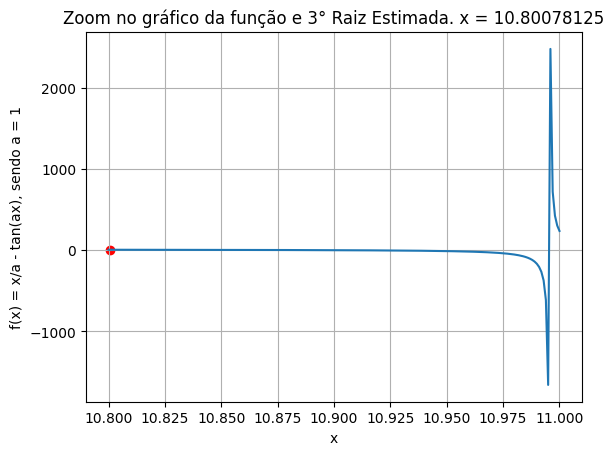

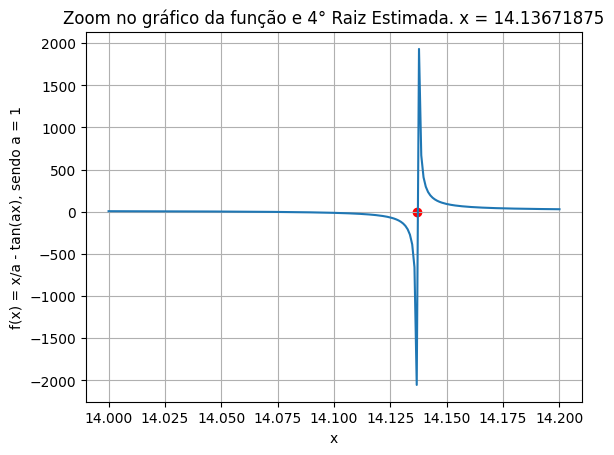

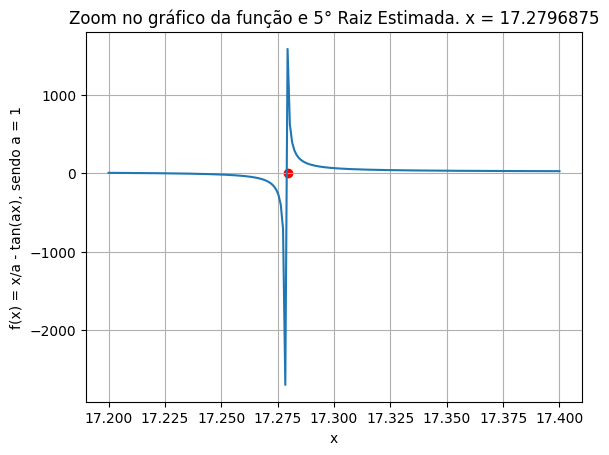

In [30]:
# x_sup = Limite superior do intervalo
# x_inf = Limite inferior do intervalo
# erro_aceitavel = Erro aceitavel para condicao de parada
# iter_maximo = Numero maximo de iteracoes
# x_raiz = Valor de x que e a raiz estimada pelo metodo
# erro_abs = Erro absoluto

import math

def funcao(x):
    return x / a - math.tan(a * x)

def bissecao(x_inf, x_sup, erro_aceitavel, iter_maximo, x_raiz=0):
    for i in range(0, iter_maximo):
        x_raiz_ant = x_raiz
        x_raiz = (x_inf + x_sup) / 2
        if x_raiz != 0:
            erro_abs = abs((x_raiz - x_raiz_ant) / x_raiz) * 100
        trocou_sinal = 0 > funcao(x_sup) * funcao(x_raiz)
        if trocou_sinal:
            x_inf = x_raiz
        elif not trocou_sinal:
            x_sup = x_raiz
        else:
            erro_abs = 0
        if erro_abs < erro_aceitavel:
            break

    return x_raiz

matriz_intervalosA1 = [[ 4.4, 4.6 ],
                     [ 7.6 , 7.8 ],
                     [ 10.8 , 11 ],
                     [ 14, 14.2 ],
                     [ 17.2 , 17.4 ]]

## Calculando Raizes para a = 1
x_raizes = []
a = 1

for linha in matriz_intervalosA1:
    x_raizes.append(bissecao(linha[0], linha[1], 0.01, iter_maximo))

# Plotando graficos
print_graficos(matriz_intervalosA1, x_raizes, "Bissecao")

### Calculando Raizes para a = 2

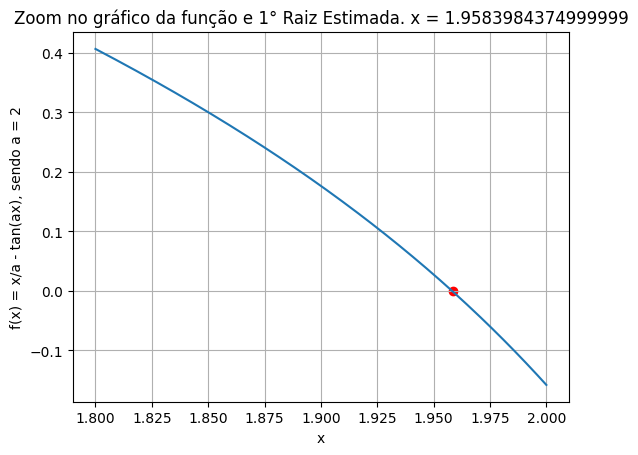

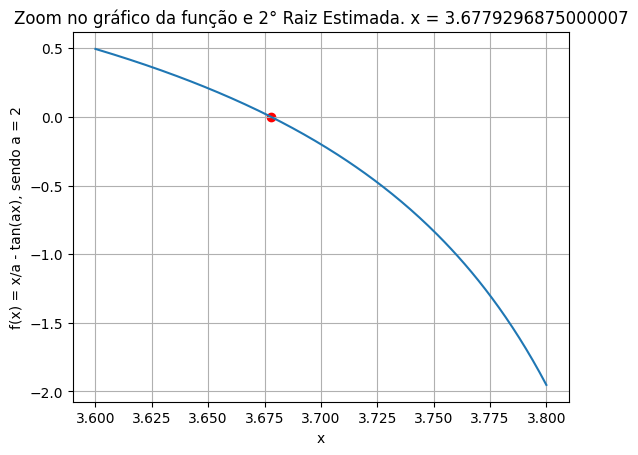

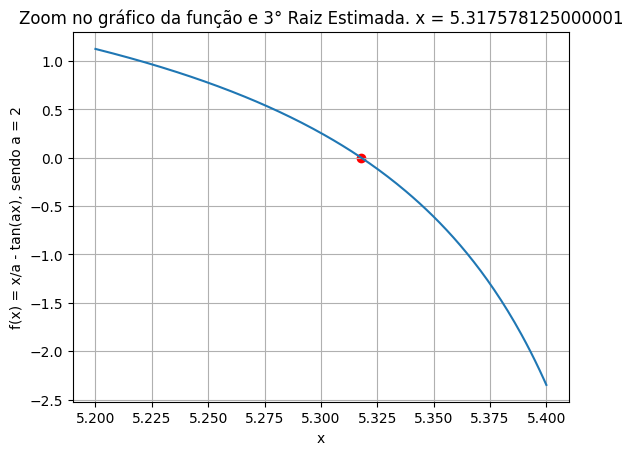

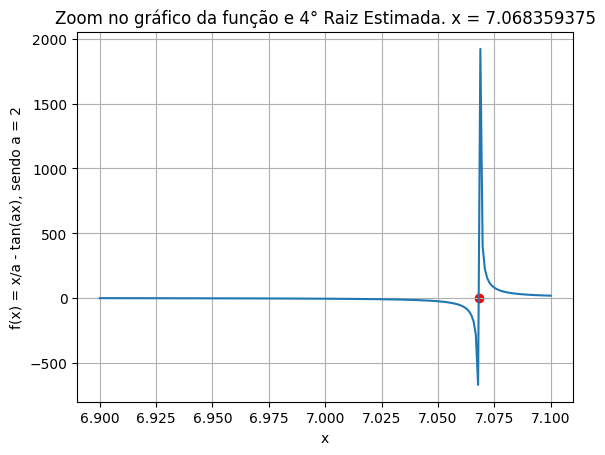

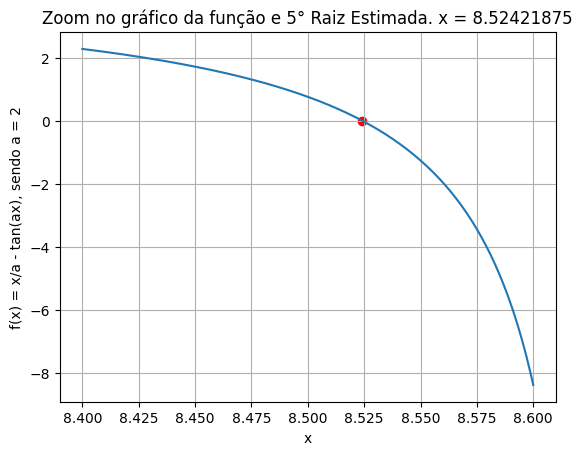

In [31]:
x_raizes = []
a = 2

matriz_intervalosA2 = [[ 1.8, 2 ],
                     [ 3.6 , 3.8 ],
                     [ 5.2 , 5.4 ],
                     [ 6.9 , 7.1 ],
                     [ 8.4 , 8.6 ]]

for linha in matriz_intervalosA2:
    x_raizes.append(bissecao(linha[0], linha[1], 0.01, iter_maximo))

# Plotando graficos
print_graficos(matriz_intervalosA2, x_raizes, "Bissecao")

## Método da falsa posição

Também conhecido como método da interpolação linear, este método utiliza uma aproximação linear da função entre dois pontos do intervalo, em vez de dividir o intervalo ao meio.Pode convergir mais rapidamente do que a bisseção, pois usa informações adicionais sobre a função. No entanto, é menos estável que a bisseção e pode sofrer de problemas de convergência se a função tiver alguns tipos de comportamentos próximos as raizes.

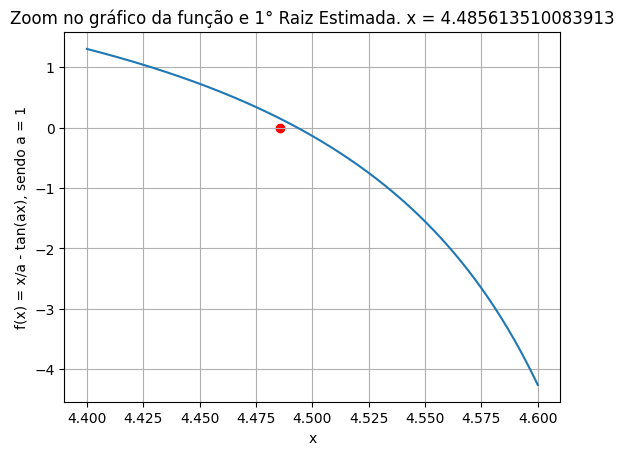

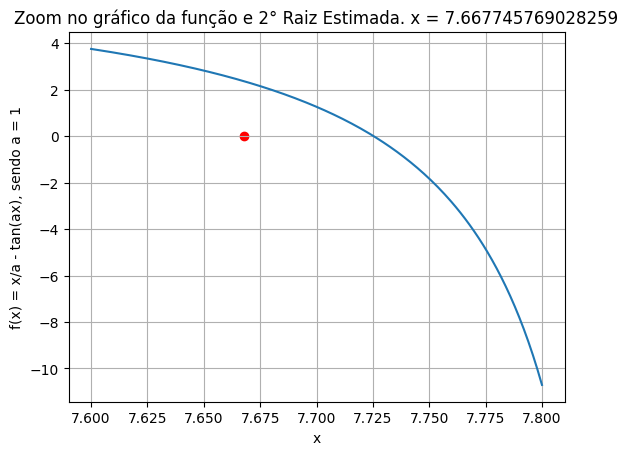

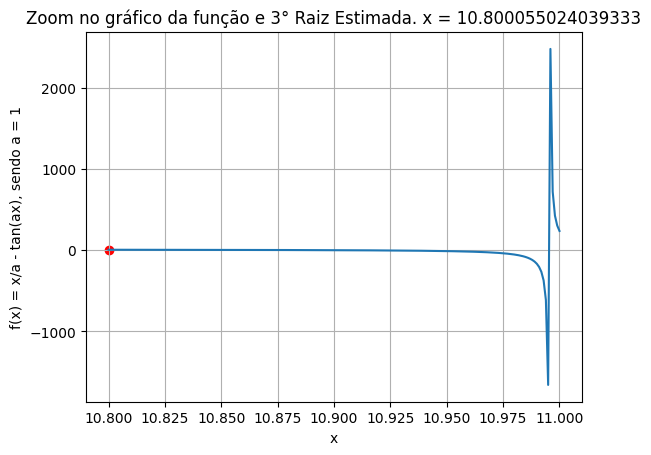

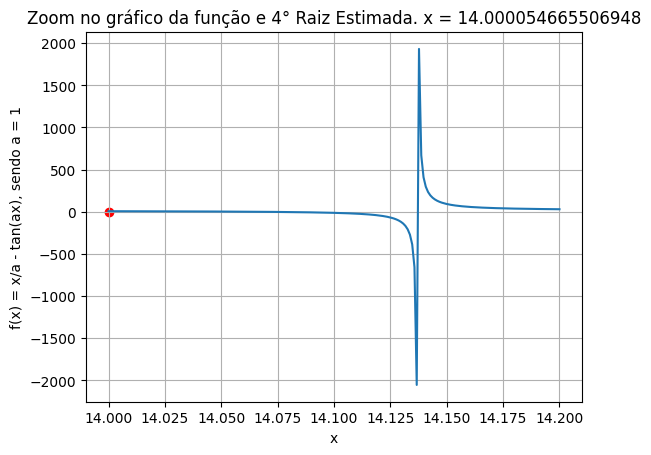

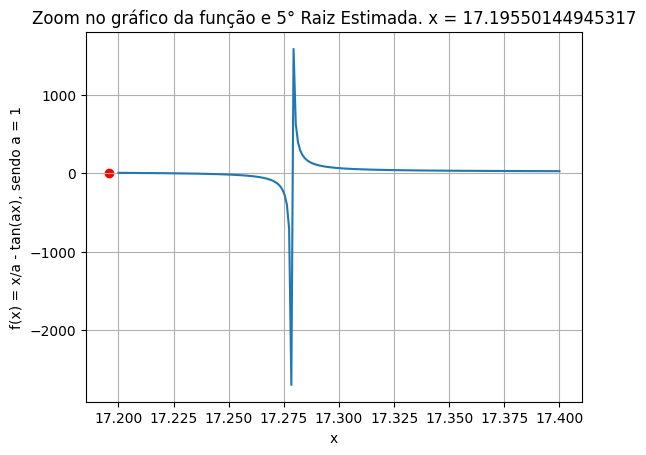

In [32]:
def falsa_posicao(x_inf, x_sup, erro_aceitavel, iter_maximo, x_raiz=0):
    funcao_em_x_inf =  funcao(x_inf)
    funcao_em_x_sup =  funcao(x_sup)
    i_x_inf = 0
    i_x_sup = 0

    for i in range(iter_maximo):
        x_raiz_ant = x_raiz
        x_raiz = x_sup - funcao_em_x_sup * (x_inf - x_sup) / (funcao_em_x_inf - funcao_em_x_sup)
        funcao_em_x_raiz = funcao(x_raiz)
        if x_raiz != 0:
            erro_abs = abs((x_raiz - x_raiz_ant) / x_raiz) * 100
        
        trocou_sinal = 0 < funcao_em_x_inf * funcao_em_x_raiz
        if trocou_sinal:
            x_sup = x_raiz
            funcao_em_x_sup = funcao(x_sup)
            i_x_sup = 0
            i_x_inf += 1
            if i_x_inf >= 2:
                funcao_em_x_inf = funcao_em_x_inf / 2
        elif not trocou_sinal:
            x_inf = x_raiz
            funcao_em_x_inf = funcao(x_inf)
            i_x_inf = 0
            i_x_sup += 1
            if i_x_sup >= 2:
                funcao_em_x_sup = funcao_em_x_sup / 2
        else:
            erro_abs = 0
        if erro_abs < erro_aceitavel:
            break   
    return x_raiz

x_raizes = []
a = 1

for linha in matriz_intervalosA1:
    x_raizes.append(falsa_posicao(linha[0], linha[1], 0.01, iter_maximo))

# Plotando graficos
print_graficos(matriz_intervalosA1, x_raizes, "Falsa Posição")


### Calculando Raizes para a = 2

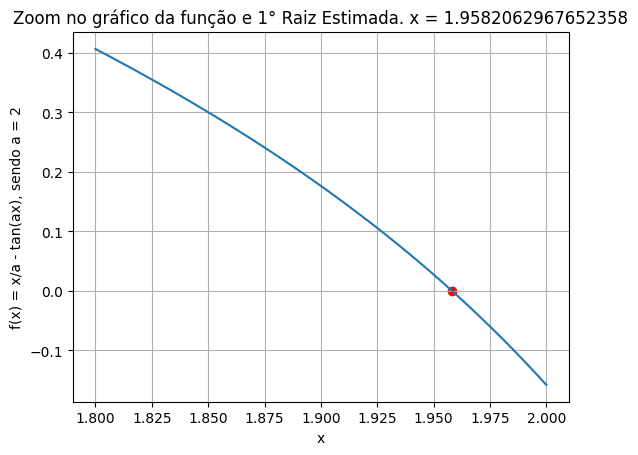

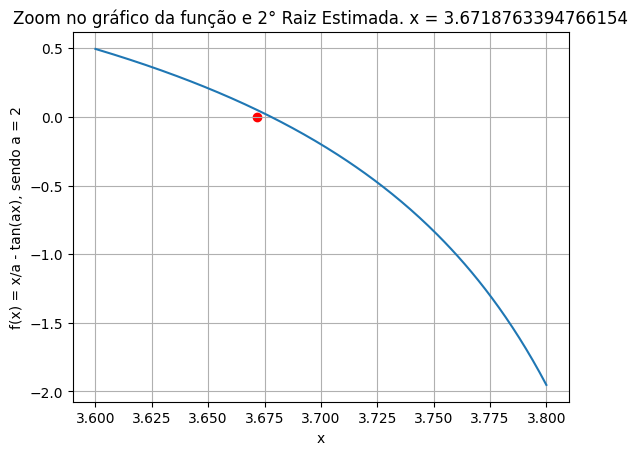

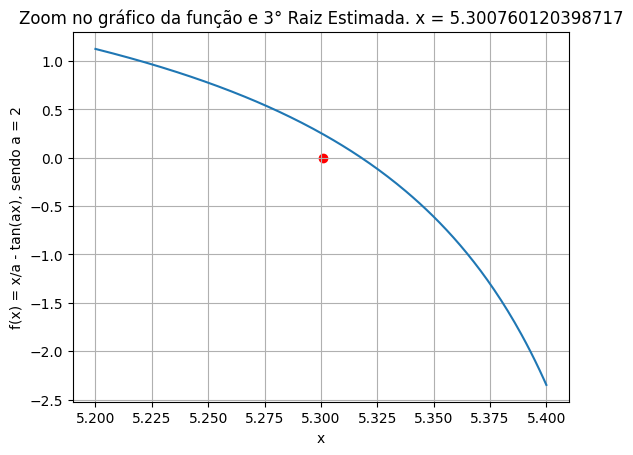

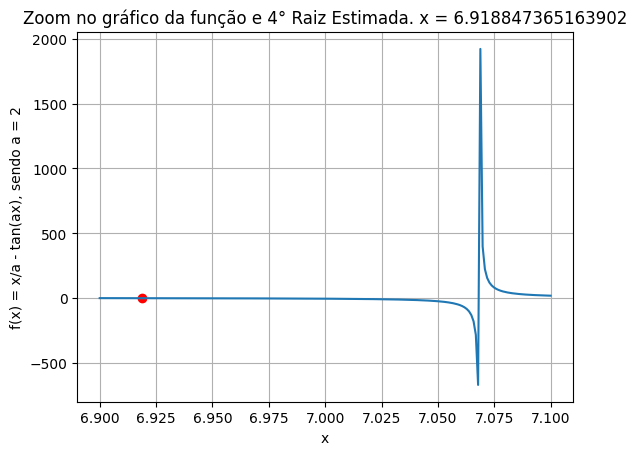

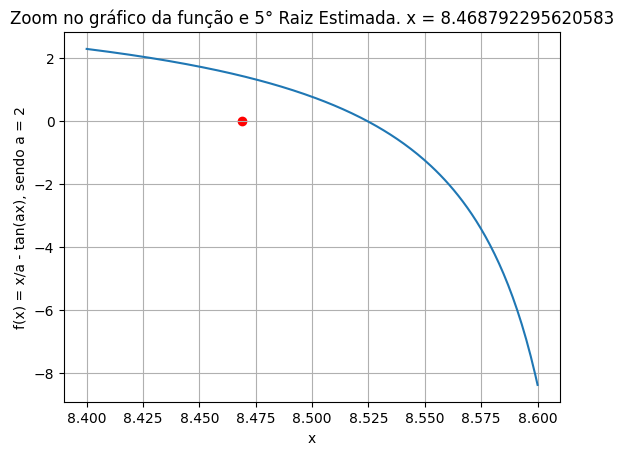

In [33]:
x_raizes = []
a = 2

for linha in matriz_intervalosA2:
    x_raizes.append(falsa_posicao(linha[0], linha[1], 0.01, iter_maximo))

# Plotando graficos
print_graficos(matriz_intervalosA2, x_raizes, "Falsa Posição")

## Método do Ponto Fixo

Este método converte o problema de encontrar uma raiz em um problema de encontrar o ponto fixo de uma função auxiliar. Requer a escolha de uma função de iteração [g(x)] apropriada, e a convergência depende da escolha dessa função. A g(x) escolhida foi:
$$
x - \frac{{x/a - \tan(x \cdot a)}}{{1/a - (a \cdot {\sec^2(x \cdot a)})}} 
$$

In [34]:
funcaoG = lambda x: x - (( x/a - math.tan(x*a)) / (1/a - (a * 1 / math.cos(x*a)**2)))


def ponto_fixo(x0, erro_aceitavel, iter_maximo):
    x_raiz = x0
    for i in range(iter_maximo):
        x_raiz_ant = x_raiz
        x_raiz = funcaoG(x_raiz_ant)
        if x_raiz != 0:
            erro_abs = abs((x_raiz - x_raiz_ant) / x_raiz)
        if erro_abs < erro_aceitavel:
            return x_raiz
        
    return None

x_raizes = []
a = 1

for linha in matriz_intervalosA1:
    x_raizes.append(ponto_fixo(4.275, erro_aceitavel, iter_maximo))

# Plotando graficos
print_graficos(matriz_intervalosA1, x_raizes, "Ponto Fixo")


1° Raiz não encontrada. O algoritmo Ponto Fixo não foi capaz de encontrar uma raiz no intervalo[4.4, 4.6] após 10 iterações.

2° Raiz não encontrada. O algoritmo Ponto Fixo não foi capaz de encontrar uma raiz no intervalo[7.6, 7.8] após 10 iterações.

3° Raiz não encontrada. O algoritmo Ponto Fixo não foi capaz de encontrar uma raiz no intervalo[10.8, 11] após 10 iterações.

4° Raiz não encontrada. O algoritmo Ponto Fixo não foi capaz de encontrar uma raiz no intervalo[14, 14.2] após 10 iterações.

5° Raiz não encontrada. O algoritmo Ponto Fixo não foi capaz de encontrar uma raiz no intervalo[17.2, 17.4] após 10 iterações.


### Calculando Raizes para a = 2

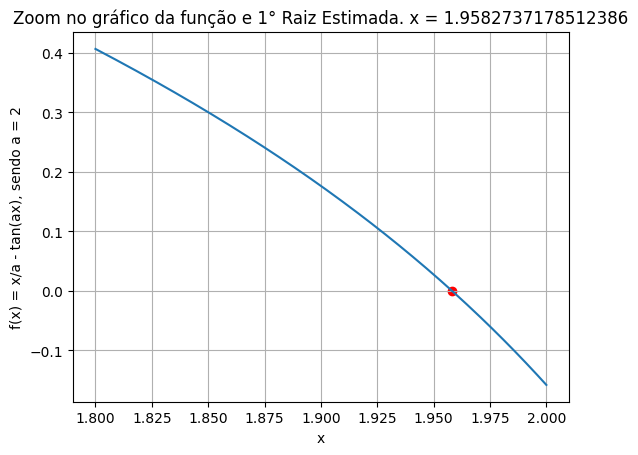

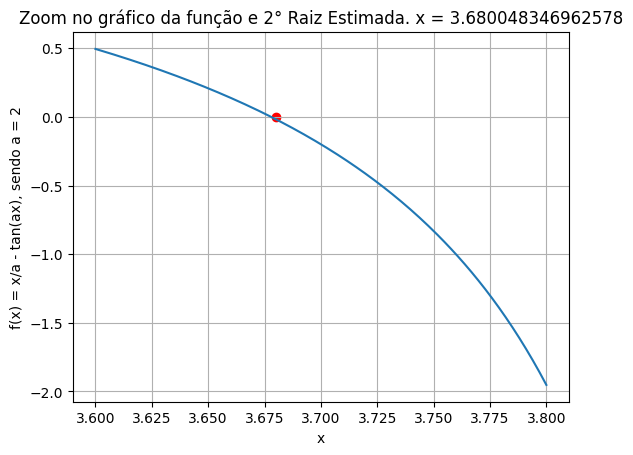

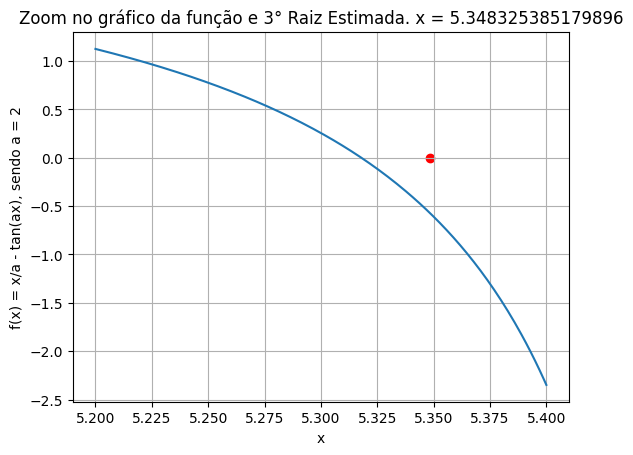

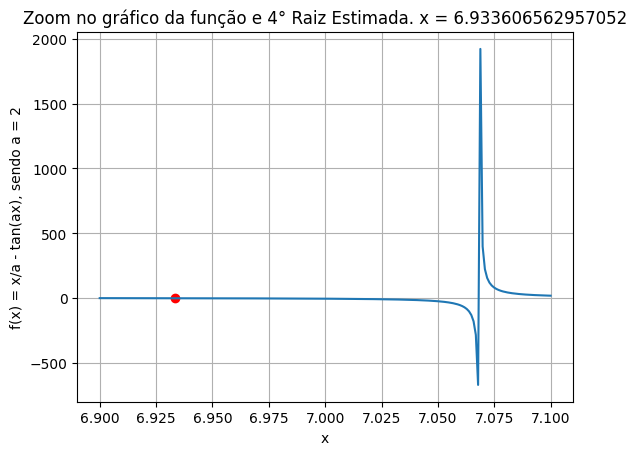

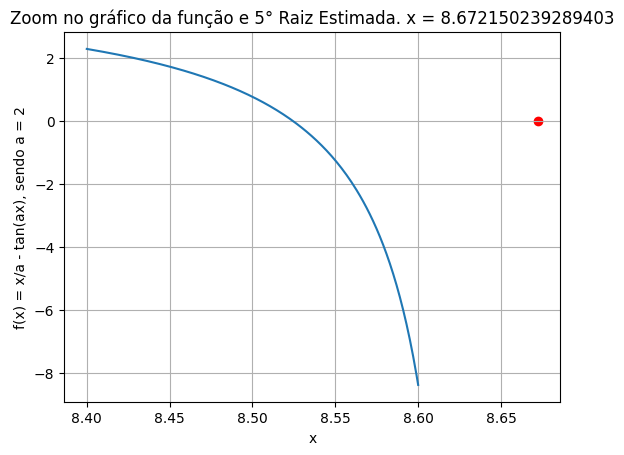

In [35]:
x_raizes = []
a = 2

for linha in matriz_intervalosA2:
    x_raizes.append(ponto_fixo(linha[0], 0.01, iter_maximo))

# Plotando graficos
print_graficos(matriz_intervalosA2, x_raizes, "Ponto Fixo")

## Método de Newton-Raphson

Também conhecido como método de Newton, é um dos métodos mais eficientes para encontrar raízes. Baseia-se na ideia de aproximar a função por uma reta tangente em vez de uma reta secante, como no método da secante. Pode convergir rapidamente, mas requer o cálculo da derivada da função. O que pode ser difícil em alguns casos. para este caso a deficada é:
$
x - \frac{{x/a - \tan(x \cdot a)}}{{1/a - (a \cdot \frac{1}{\cos^2(x \cdot a)})}}
$

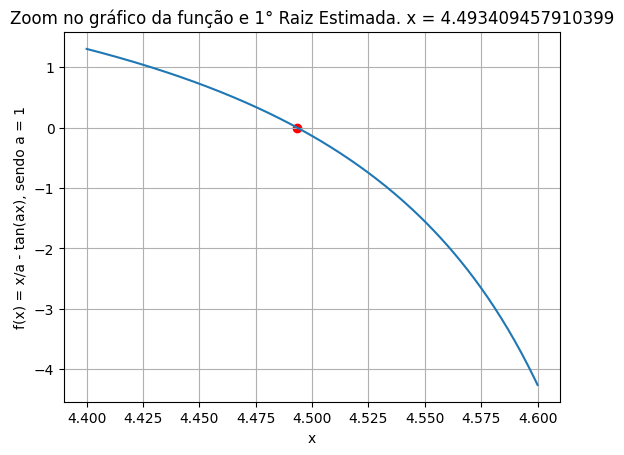


2° Raiz não encontrada. O algoritmo Newton-Raphson não foi capaz de encontrar uma raiz no intervalo[7.6, 7.8] após 10 iterações.

3° Raiz não encontrada. O algoritmo Newton-Raphson não foi capaz de encontrar uma raiz no intervalo[10.8, 11] após 10 iterações.


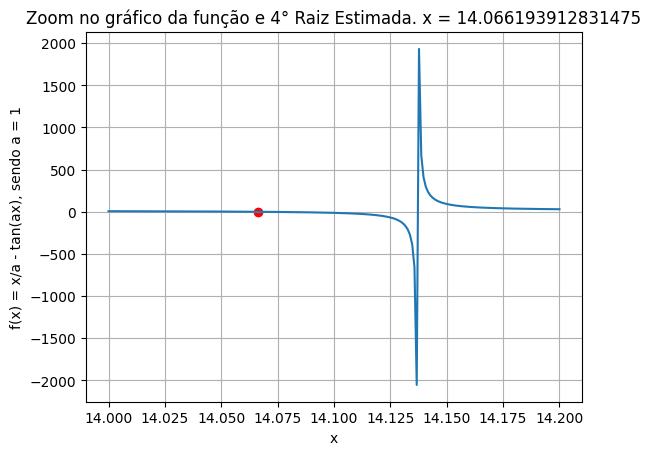

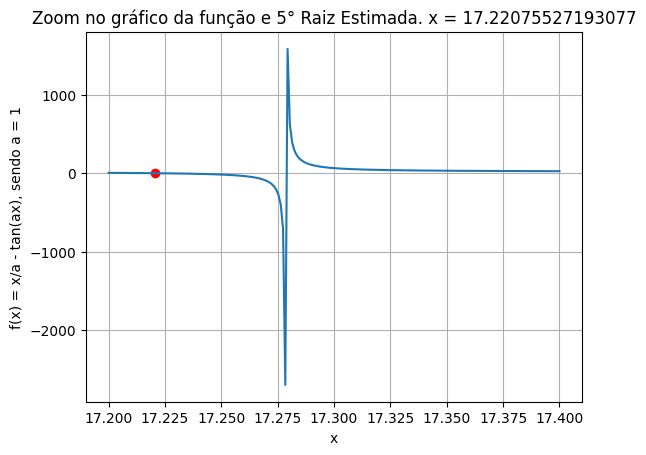

In [36]:
derivada_funcao = lambda x: 1 / a - 1 / math.cos(a * x) ** 2 * a 
 
def newton_raphson(x0, erro_aceitavel, iter_maximo):
    x_raiz = x0

    for i in range(iter_maximo):
        fx = funcao(x_raiz)
        if abs(fx) < erro_aceitavel:
            return x_raiz
        dfx = derivada_funcao(x_raiz)
        if dfx == 0:
            return None
        x_raiz = x_raiz - fx / dfx
        
    return None

x_raizes = []
a = 1

for linha in matriz_intervalosA1:
    x_raizes.append(newton_raphson(linha[0], erro_aceitavel, iter_maximo))

# Plotando graficos
print_graficos(matriz_intervalosA1, x_raizes, "Newton-Raphson")

### Calculando Raizes para a = 2

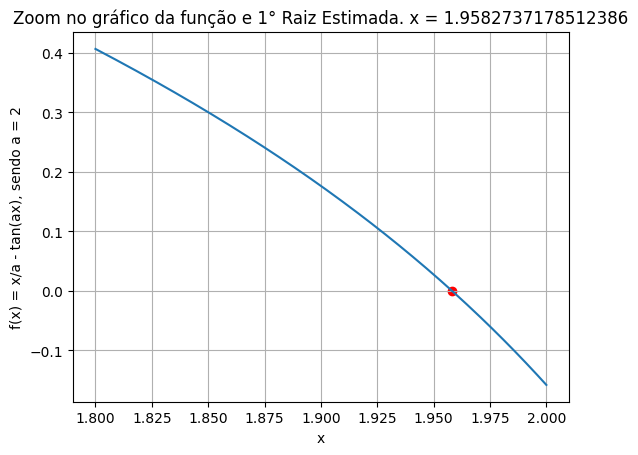

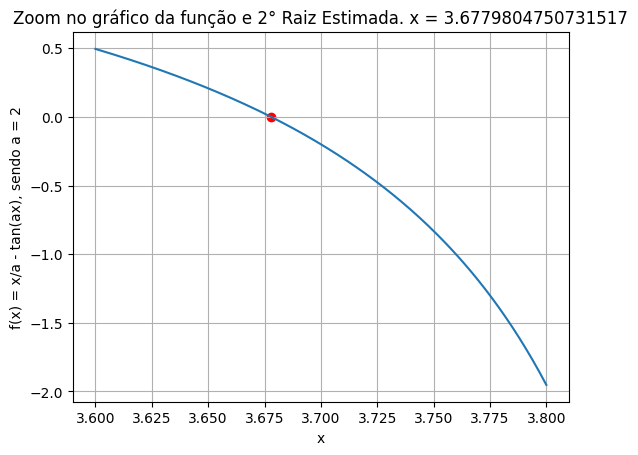

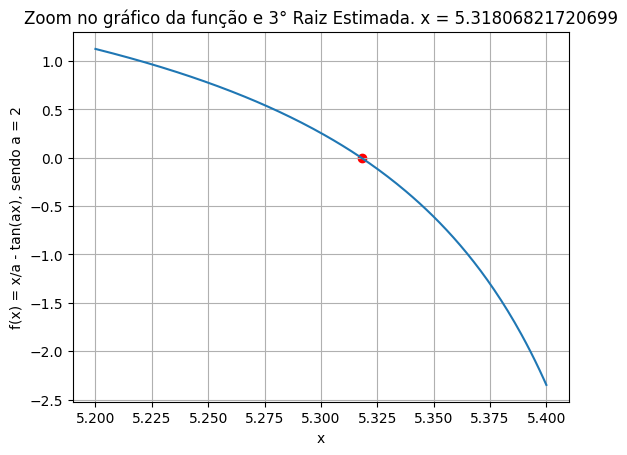

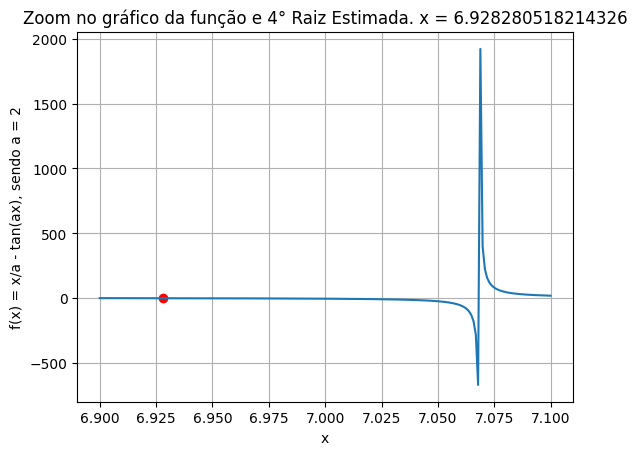


5° Raiz não encontrada. O algoritmo Newton-Raphson não foi capaz de encontrar uma raiz no intervalo[8.4, 8.6] após 10 iterações.


In [37]:
x_raizes = []
a = 2

for linha in matriz_intervalosA2:
    x_raizes.append(newton_raphson(linha[0], 0.01, iter_maximo))

# Plotando graficos
print_graficos(matriz_intervalosA2, x_raizes, "Newton-Raphson")

## Método da secante

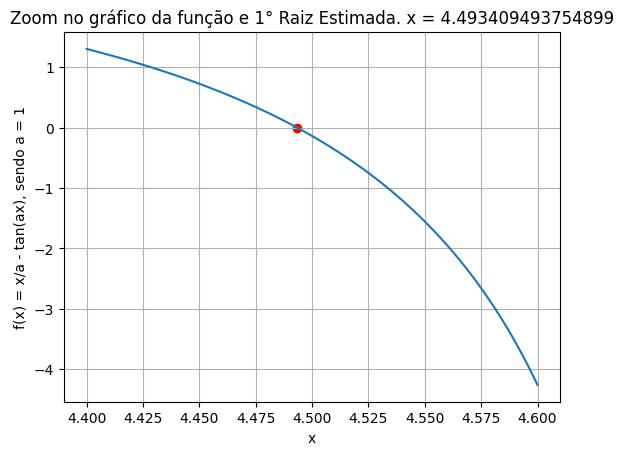

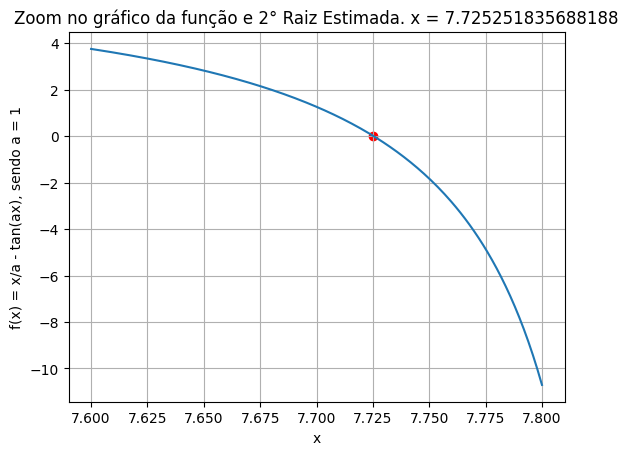


3° Raiz não encontrada. O algoritmo Secante não foi capaz de encontrar uma raiz no intervalo[10.8, 11] após 10 iterações.

4° Raiz não encontrada. O algoritmo Secante não foi capaz de encontrar uma raiz no intervalo[14, 14.2] após 10 iterações.

5° Raiz não encontrada. O algoritmo Secante não foi capaz de encontrar uma raiz no intervalo[17.2, 17.4] após 10 iterações.


In [38]:
derivada_funcao = lambda x: 1 / a - 1 / math.cos(a * x) ** 2 * a 
 
def secante(x0, x1, erro_aceitavel, iter_maximo):
    
    for i in range(iter_maximo):
        fx0 = funcao(x0)
        fx1 = funcao(x1)

        if abs(fx1) < erro_aceitavel:
            return x1
        
        if fx1 - fx0 == 0:
            return None
        
        x_proximo = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        
        if abs(x_proximo - x1) < erro_aceitavel:
            return x_proximo
        
        x0 = x1
        x1 = x_proximo

    return None

x_raizes = []
a = 1

for linha in matriz_intervalosA1:
    x_raizes.append(secante(linha[0], linha[1], erro_aceitavel, iter_maximo))

# Plotando graficos
print_graficos(matriz_intervalosA1, x_raizes, "Secante")

### Calculando Raizes para a = 2

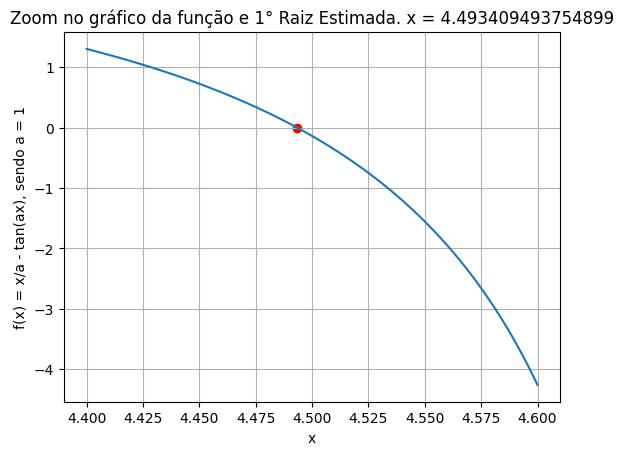

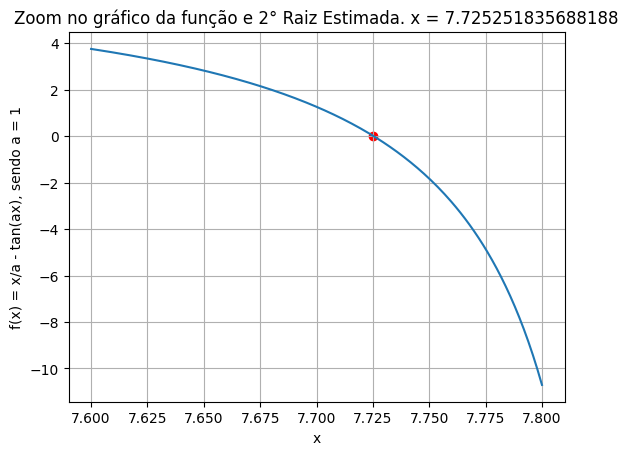


3° Raiz não encontrada. O algoritmo Secante não foi capaz de encontrar uma raiz no intervalo[10.8, 11] após 10 iterações.

4° Raiz não encontrada. O algoritmo Secante não foi capaz de encontrar uma raiz no intervalo[14, 14.2] após 10 iterações.

5° Raiz não encontrada. O algoritmo Secante não foi capaz de encontrar uma raiz no intervalo[17.2, 17.4] após 10 iterações.


In [39]:
x_raizes = []
a = 1

for linha in matriz_intervalosA1:
    x_raizes.append(secante(linha[0], linha[1], erro_aceitavel, iter_maximo))

# Plotando graficos
print_graficos(matriz_intervalosA1, x_raizes, "Secante")

## Análise dos Resultados Obtidos



Em resumo, a escolha do método numérico para localização de raízes depende das características específicas da função em questão, incluindo sua suavidade, continuidade e disponibilidade de informações como a derivada. Cada método tem suas próprias vantagens e limitações, e é importante selecionar o método mais adequado para o problema em mãos, levando em consideração a precisão desejada, a eficiência computacional e a estabilidade do algoritmo.